# Exercise - Multi-Agent Architecture Design - SOLUTION

In this exercise, you will design a multi-agent system architecture for a real-world scenario, choosing between orchestrator and peer-to-peer patterns, and implementing the chosen design.

**Challenge**

You're building a multi-agent system for a real-world business process. You need to analyze
the requirements, choose the appropriate architecture pattern, and implement a working prototype that demonstrates your design decisions.

Your solution should:
1. Define a clear business scenario with specific requirements
2. Identify agent roles and responsibilities
3. Choose between orchestrator (supervisor/hierarchical) or peer-to-peer (pipeline/network) patterns
4. Design the data flow and communication protocols
5. Implement a working prototype using LangGraph
6. Create a visual diagram of your architecture


## 0. Import the necessary libs

In [1]:
from typing import Literal
import random
import nest_asyncio
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import MessagesState
from langgraph.types import Command

In [2]:
nest_asyncio.apply()

## 1. Define Your Business Scenario

Choose ONE of these scenarios or create your own:

- **(A)** Customer Support Ticket System
- **(B)** E-commerce Order Processing
- **(C)** Content Creation Pipeline
- **(D)** Healthcare Appointment System

`TODO`: Write down all the details of your scenario:

**Healthcare Appointment System**

This system handles the complete lifecycle of medical appointments from initial request to post-appointment follow-up. The workflow must be structured and sequential to ensure patient safety, proper scheduling, and compliance with healthcare regulations.

Key Requirements:
- Strict workflow order for patient safety and compliance
- Centralized oversight to prevent scheduling conflicts
- Patient verification and eligibility checks
- Doctor availability management
- Automated reminders and notifications
- Audit trail for healthcare compliance

**Workflow Steps:**
1. Appointment request received
2. Doctor availability checked
3. Patient verification and eligibility confirmed
4. Appointment scheduled and confirmed
5. Reminders sent to patient and doctor


## 2. Define Agent Roles and Responsibilities

`TODO`: For your chosen scenario, define 4-6 agents with specific responsibilities:

**Agent 1: Appointment Coordinator (Supervisor)**

Responsibilities: 
- Receives initial appointment requests
- Orchestrates the entire workflow
- Makes routing decisions based on request type and urgency
- Maintains overall workflow state
- Handles exceptions and escalations

**Agent 2: Doctor Availability Agent**

Responsibilities:
- Checks doctor schedules and availability
- Identifies suitable time slots
- Handles scheduling conflicts
- Updates availability in real-time
- Provides availability recommendations

**Agent 3: Patient Verification Agent**

Responsibilities:
- Validates patient identity and insurance
- Checks eligibility for requested services
- Verifies patient history and preferences
- Handles insurance pre-authorization
- Manages patient records

**Agent 4: Scheduling Agent**

Responsibilities:
- Books the actual appointment
- Sends confirmation to patient and doctor
- Updates all relevant calendars
- Handles rescheduling requests
- Manages appointment conflicts

**Agent 5: Notification Agent**

Responsibilities:
- Sends appointment reminders
- Handles communication preferences
- Manages SMS, email, and phone notifications
- Sends pre-appointment instructions
- Handles cancellation notifications

## 3. Choose Your Architecture Pattern

A) ORCHESTRATOR PATTERN (Supervisor or Hierarchical)
- Use when: You need centralized control, strict workflow order, or complex state management
- Best for: Structured workflows where order matters, complex business processes

B) PEER-TO-PEER PATTERN (Pipeline or Network)
- Use when: You need flexibility, agents can work independently, or dynamic routing
- Best for: Flexible workflows, independent agent operations, dynamic decision-making

`TODO`: Based on your scenario requirements, choose ONE pattern and explain it:

Pattern: ORCHESTRATOR PATTERN (Supervisor)

Reasoning: Healthcare appointments require strict workflow order for patient safety and compliance. The supervisor pattern provides centralized control to ensure each step is completed in the correct sequence, prevents scheduling conflicts, and maintains audit trails required for healthcare regulations.


Data Flow: The Appointment Coordinator (supervisor) receives the initial request and routes it sequentially through each specialized agent. Each agent reports back to the supervisor, which then decides the next step based on the results and any exceptions that arise.



## 4. Draw Your Multi-Agent System

`TODO`: Create your agents and workflow based on your chosen pattern and draw a visual representation of your multi-agent system:

In [3]:
class State(MessagesState):
    doctor_available: bool
    patient_verified: bool
    appointment_scheduled: bool
    notifications_sent: bool

In [4]:
def appointment_coordinator(state: State) -> Command[Literal["doctor_availability_agent", "patient_verification_agent", "scheduling_agent", "notification_agent", END]]:
    """Supervisor agent that orchestrates the appointment workflow"""
    print("🔄 Appointment Coordinator: Processing appointment request...")
    
    # Check current state to determine next step
    if not state["doctor_available"]:
        next_step = "doctor_availability_agent"
        print(f"📋 Routing to: {next_step}")
    elif not state["patient_verified"]:
        next_step = "patient_verification_agent"
        print(f"📋 Routing to: {next_step}")
    elif not state["appointment_scheduled"]:
        next_step = "scheduling_agent"
        print(f"📋 Routing to: {next_step}")
    elif not state["notifications_sent"]:
        next_step = "notification_agent"
        print(f"📋 Routing to: {next_step}")
    else:
        next_step = END
        print(f"✅ Workflow complete, ending...")
    
    return Command(goto=next_step)

In [5]:
def doctor_availability_agent(state: State) -> Command[Literal["appointment_coordinator"]]:
    """Checks doctor availability and schedules"""
    print("👨‍⚕️ Doctor Availability Agent: Checking schedules...")
    
    # Simulate checking doctor availability
    available = random.choice([True, False])
    if available:
        print("✅ Doctor is available for requested time")
    else:
        print("❌ Doctor not available, suggesting alternatives")
    
    return Command(
        goto="appointment_coordinator",
        update={"doctor_available": available}
    )

In [6]:
def patient_verification_agent(state: State) -> Command[Literal["appointment_coordinator"]]:
    """Verifies patient identity and eligibility"""
    print("🆔 Patient Verification Agent: Verifying patient...")
    
    # Simulate patient verification
    verified = random.choice([True, False])
    if verified:
        print("✅ Patient verified and eligible")
    else:
        print("❌ Patient verification failed")
    
    return Command(
        goto="appointment_coordinator",
        update={"patient_verified": verified}
    )

In [7]:
def scheduling_agent(state: State) -> Command[Literal["appointment_coordinator"]]:
    """Books the actual appointment"""
    print("📅 Scheduling Agent: Booking appointment...")
    
    # Simulate appointment booking
    booked = random.choice([True, False])
    if booked:
        print("✅ Appointment successfully booked")
    else:
        print("❌ Appointment booking failed")
    
    return Command(
        goto="appointment_coordinator",
        update={"appointment_scheduled": booked}
    )

In [8]:
def notification_agent(state: State) -> Command[Literal["appointment_coordinator"]]:
    """Sends notifications and reminders"""
    print("📢 Notification Agent: Sending notifications...")
    
    # Simulate sending notifications
    notifications_sent = random.choice([True, False])
    if notifications_sent:
        print("✅ Notifications sent successfully")
    else:
        print("❌ Failed to send notifications")
    
    return Command(
        goto="appointment_coordinator",
        update={"notifications_sent": notifications_sent}
    )

In [9]:
workflow = StateGraph(State)

# Add all nodes
workflow.add_node(appointment_coordinator)
workflow.add_node(doctor_availability_agent)
workflow.add_node(patient_verification_agent)
workflow.add_node(scheduling_agent)
workflow.add_node(notification_agent)

workflow.add_edge(START, "appointment_coordinator")


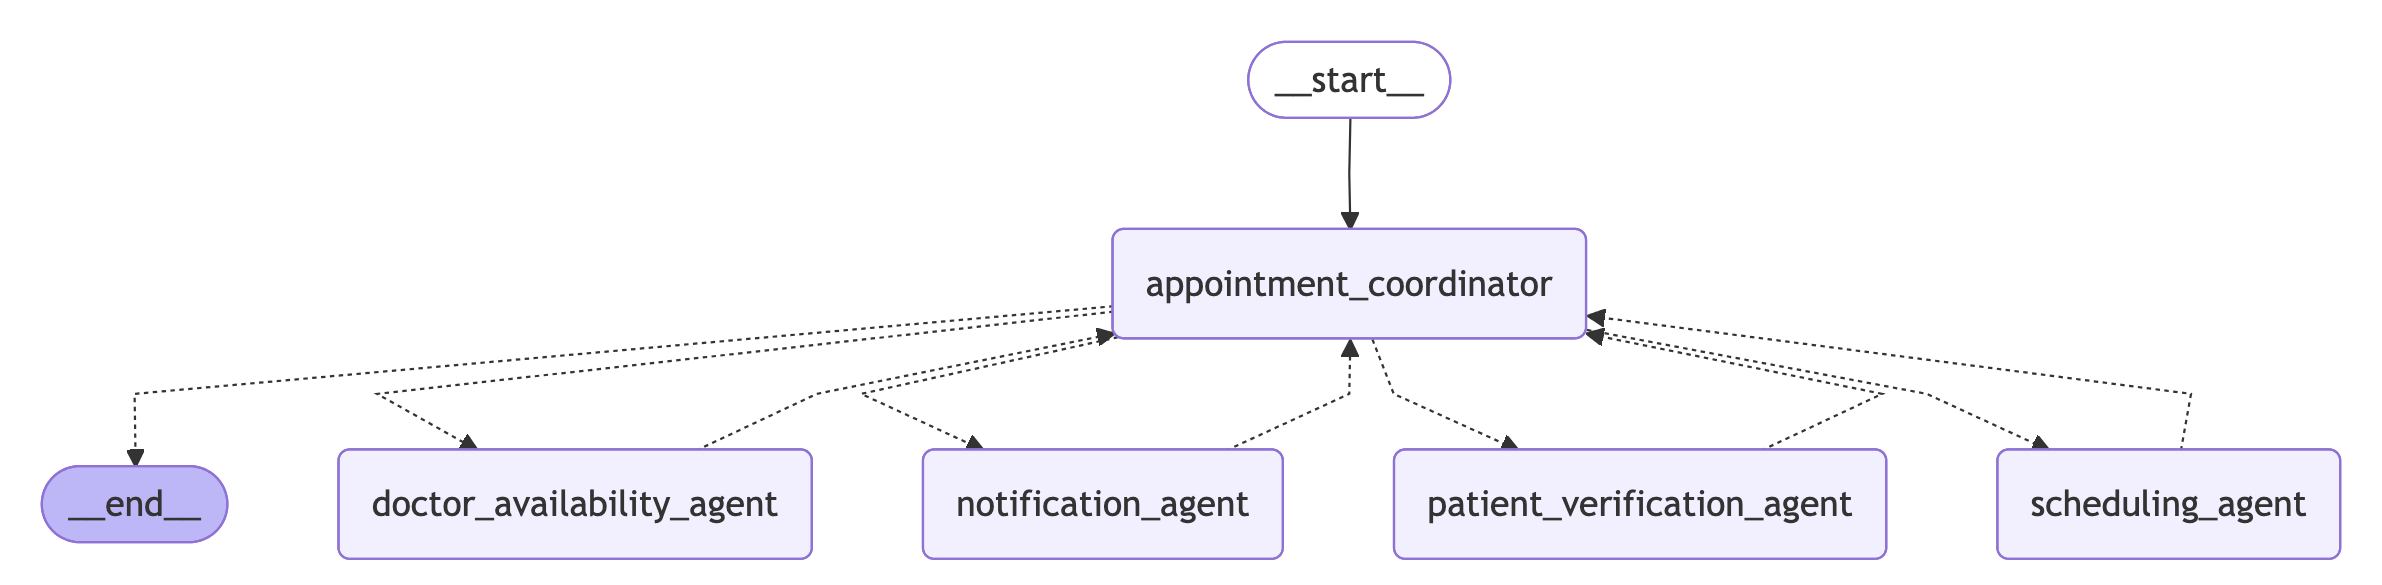

In [10]:
# Compile and visualize:
graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [11]:
# Test the workflow
print("Testing Healthcare Appointment System...")
result = graph.invoke(
    input={
        "doctor_available": False,
        "patient_verified": False,
        "appointment_scheduled": False,
        "notifications_sent": False,
    }
)
print("✅ Workflow execution completed!")

Testing Healthcare Appointment System...
🔄 Appointment Coordinator: Processing appointment request...
📋 Routing to: doctor_availability_agent
👨‍⚕️ Doctor Availability Agent: Checking schedules...
✅ Doctor is available for requested time
🔄 Appointment Coordinator: Processing appointment request...
📋 Routing to: patient_verification_agent
🆔 Patient Verification Agent: Verifying patient...
❌ Patient verification failed
🔄 Appointment Coordinator: Processing appointment request...
📋 Routing to: patient_verification_agent
🆔 Patient Verification Agent: Verifying patient...
✅ Patient verified and eligible
🔄 Appointment Coordinator: Processing appointment request...
📋 Routing to: scheduling_agent
📅 Scheduling Agent: Booking appointment...
❌ Appointment booking failed
🔄 Appointment Coordinator: Processing appointment request...
📋 Routing to: scheduling_agent
📅 Scheduling Agent: Booking appointment...
❌ Appointment booking failed
🔄 Appointment Coordinator: Processing appointment request...
📋 Rout

## 5. Reflection Questions

Answer these questions about your design:
1. Why did you choose your architecture pattern?
2. What are the main advantages of your chosen pattern for this scenario?
3. What challenges might you face with this architecture?
4. How would you modify your system if requirements changed?